# lista 3
### model propagacji

In [1]:
import numpy as np, random, matplotlib.pyplot as plt

In [3]:
def site(m, n, p):
    L = np.zeros((m,n))
    for x in range(m):
        for y in range(n):
            if random.random() < p:
                L[x][y] = 1
    return L

In [13]:
m = 50
n = 50
p1 = 0.2
p2 = 0.8

L1 = site(m,n,p1)
L2 = site(m,n,p2)

In [16]:
def dwa(L):
    for j in range(n):
        if L[0][j] == 1:
            L[0][j] = 2

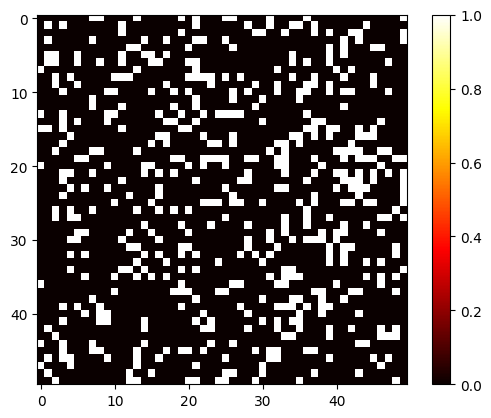

In [14]:
plt.imshow(L1, cmap='hot', interpolation='nearest')

# Dodanie siatki
# plt.grid(True, which='both', linestyle='None', color='k', linewidth=1)
plt.colorbar()
plt.show()

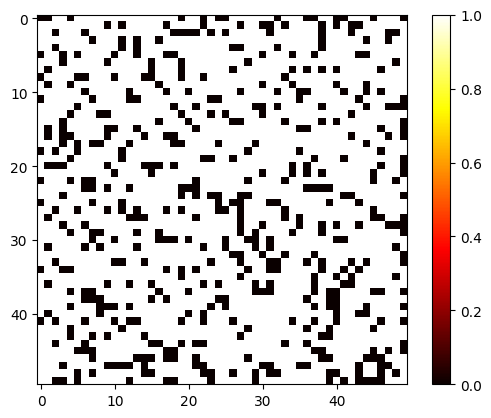

In [15]:
plt.imshow(L2, cmap='hot', interpolation='nearest')

# Dodanie siatki
# plt.grid(True, which='both', linestyle='None', color='k', linewidth=1)
plt.colorbar()
plt.show()

In [6]:
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
# 'viridis': Domyślna mapa kolorów w matplotlib, zapewnia dobrą percepcję zmian wartości.
# 'plasma': Zapewnia dobrą percepcję zmian wartości, szczególnie dla osób z zaburzeniami percepcji kolorów.
# 'inferno': Ma podobne właściwości do 'plasma', ale z bardziej intensywnym czerwonym.
# 'magma': Zapewnia lepszą percepcję kontrastu w stosunku do 'inferno'.
# 'cividis': Opracowana specjalnie do lepszej percepcji przez osoby z zaburzeniami percepcji kolorów.
# 'cool': Przechodzi od cyanu do fioletu.
# 'hot': Przechodzi od czarnego do czerwonego.
# 'bone': Zapewnia dobre odcienie szarości z niebieskim tłem.
# 'spring': Przechodzi od magenty do żółtego.
# 'winter': Przechodzi od niebieskiego do zielonego.

In [17]:
dwa(L1)

In [18]:
dwa(L2)

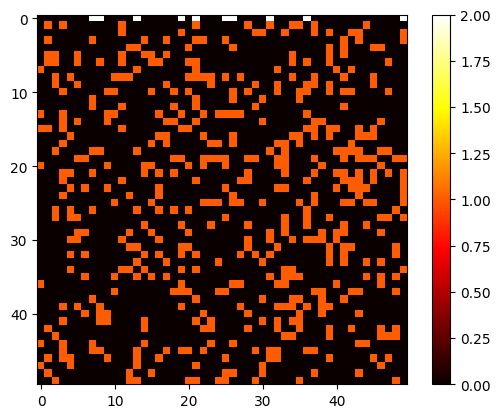

In [19]:
plt.imshow(L1, cmap='hot')
plt.colorbar()

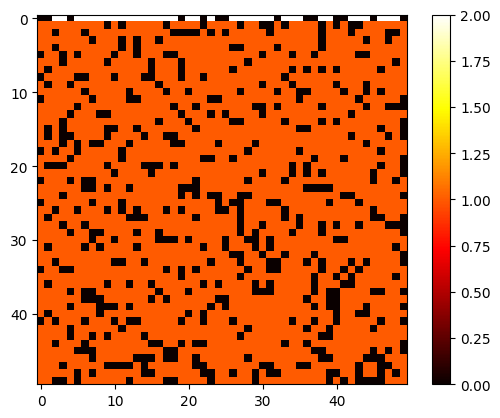

In [20]:
plt.imshow(L2, cmap='hot')
plt.colorbar()

In [10]:
def propagacja(macierz,t=2):
    for z in range(100):
        for x in range(m):
            for y in range(n):
                if macierz[x, y] == t:
                    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < m and 0 <= ny < n and macierz[nx, ny] == 1:
                            macierz[nx, ny] = t + 1
        t += 1
    return macierz

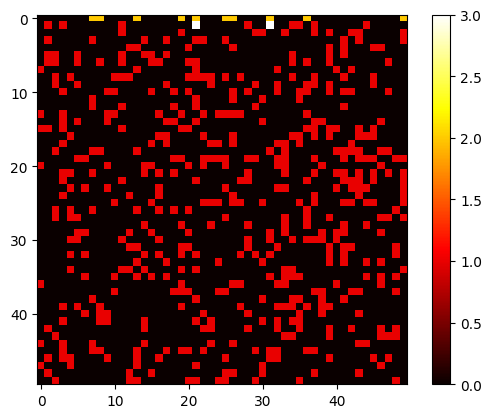

In [25]:
propagacja(L1)
plt.imshow(L1, cmap='hot')
plt.colorbar()

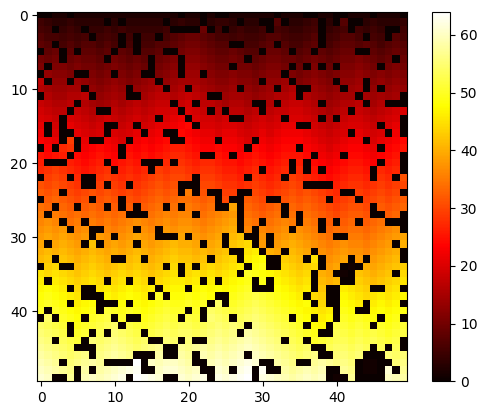

In [24]:
propagacja(L2)
plt.imshow(L2, cmap='hot')
plt.colorbar()

In [33]:
liczba_prob = 100  # Liczba prób dla każdej wartości p
wyniki = []
macierz = np.zeros((m, n))

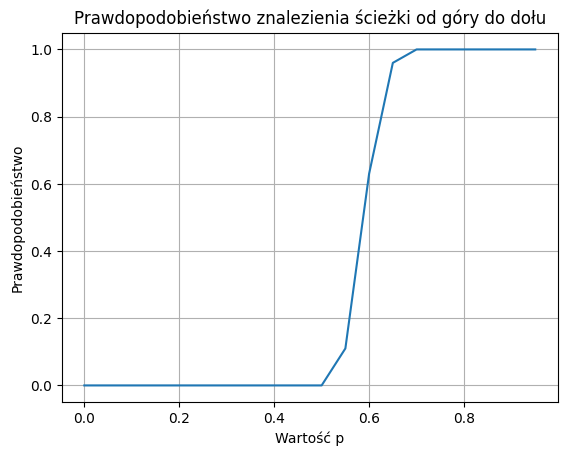

In [39]:
for p in np.arange(0, 1, 0.05):
    sukcesy = 0
    for _ in range(liczba_prob):
        macierz = site(m,n,p)

        for x in range(n):
            if macierz[0][x] == 1:
                macierz[0][x] += 1

        macierz = propagacja(macierz)

        if macierz[m - 1].max() > 1:  # Jeśli na ostatnim wierszu znajduje się wartość większa niż 1, oznacza to, że istnieje ścieżka od góry do dołu
            sukcesy += 1

    prawdopodobienstwo = sukcesy / liczba_prob
    wyniki.append(prawdopodobienstwo)

plt.plot(np.arange(0, 1, 0.05), wyniki)
plt.title('Prawdopodobieństwo znalezienia ścieżki od góry do dołu')
plt.xlabel('Wartość p')
plt.ylabel('Prawdopodobieństwo')
plt.grid(True)
plt.show()

In [46]:
f = open('plik.txt', mode='w')
p_ = np.arange(0,1,0.05)
for i in range(19):
    f.write(f'{p_[i]} {wyniki[i]} \n')
f.close()